# Amphi 4 - Convolutional Networks

# 1. Convolution

## 1.1 1D Discrete Convolution

Let 
$$
x: \mathbf Z \to \mathbf R
$$
$$
t \mapsto x(t)
$$

and
$$
w: \mathbf Z \to \mathbf R
$$
$$
t \mapsto w(t)
$$

be 2 functions 

The following function is called the **discrete convolution** of $x$ and $w$:

$$
s(t) = (x * w)(t) := \sum_{a=-\infty}^\infty x(t-a) w(t)
$$

In neural network terminology, the first function $x$ is called the **input**, while the second is called the **kernel**. The output, i.e., the convolution is sometimes referred to as the **feature map**.

## 1.2 Discrete Convolution in Higher Dimension

Let
$$
I: \mathbf Z^D \to \mathbf R
$$
$$
t = (t_1, \ldots, t_D) \mapsto I(t_1, \ldots, t_D)
$$

and
$$
K: \mathbf Z^D \to \mathbf R
$$
$$
t = (t_1, \ldots, t_D) \mapsto K(t_1, \ldots, t_D)
$$

The discrete convolution is defined as
$$
S(t) = (K * I)(t) = \sum_{a_1\in \mathbf Z} \ldots \sum_{a_D \in \mathbf Z} I(t_1 - a_1, \ldots, t_D - a_D) K(a_1, \ldots, a_D) 
$$

## 1.3 Confusion on Terminology

The following quantity is called **cross-correlation** of the function $I$ and $K$ 

$$
S(t) = (K \star I)(t) = \sum_{a_1\in \mathbf Z} \ldots \sum_{a_D \in \mathbf Z} I(t_1 + a_1, \ldots, t_D + a_D) K(a_1, \ldots, a_D) 
$$

Many machine learning libraries implement **cross-correlation** and also call it convolution. They call this kind of operation $K \star I$ the **convolution without kernel flipping** of $K$ and $I$, while $K * I$ the **convolution with kernel flipping**.

## 1.4 Examples

### 1.4.1 Time series

Suppose we observe a sequence $t_1, t_2, ...$ and modelize $t_N$ approximately by:

$$
\hat{t}_N = a_1 t_{N-1} + a_2 t_{N-2} + \ldots + a_r t_{N-r}
$$

for some $r > 0$. This can be rewritten under the form of convolution:

$$
\hat{t}_N = (x * a)(N)
$$

where
$$
x(n) = \begin{cases}
t_n, \qquad n=1, \ldots, N-1\\
0, \qquad \textrm{elsewhere}
\end{cases}
$$

and
$$
a(n) = \begin{cases}
a_n, \qquad n=1, \ldots, r\\
0, \qquad \textrm{elsewhere}
\end{cases}
$$

In matrix form, we have
$$
\begin{pmatrix}
\hat{t}_1 \\
\hat{t}_2 \\
\ldots \\
\hat{t}_{N}
\end{pmatrix} 
=
\begin{pmatrix}
a_1 & 0 & \ldots & 0 & 0 & 0 & \ldots & 0 & 0 \\
a_2 & a_1 & \ldots & 0 & 0 & 0 & \ldots & 0 & 0\\
\ldots \\
0 & 0 & \ldots & 0 & a_r & a_{r-1} & \ldots & a_2 & a_1
\end{pmatrix}
\begin{pmatrix}
t_0 \\
t_1 \\
\ldots \\
t_{N-1}
\end{pmatrix}
$$

The $N \times N$ matrix in this formula follows this rule: each of its rows equals to the row above shifted by 1 element. This is known as a **Toeplitz matrix**. 

### 1.4.2 Convolution in 2D Images

Suppose we have 2D images of size $M \times N$.
<table>
    <tr>
        <td>$t_{0,0}$</td>
        <td>$t_{0,1}$</td>
        <td>$\ldots$</td>
        <td>$t_{0,N-1}$</td>
    </tr>
    <tr>
        <td>$t_{1,0}$</td>
        <td>$t_{1,1}$</td>
        <td>$\ldots$</td>
        <td>$t_{1,N-1}$</td>
    </tr>
    <tr>
        <td>$\ldots$</td>
        <td>$\ldots$</td>
        <td>$\ldots$</td>
        <td>$\ldots$</td>
    </tr>
    <tr>
        <td>$t_{M-1,0}$</td>
        <td>$t_{M-1,1}$</td>
        <td>$\ldots$</td>
        <td>$t_{M-1,N-1}$</td>
    </tr>
</table>

Suppose we create a smoother format of the image by using some weights associated to the neighbor pixels. For example, we have the convolution:

$$
u = (u_1, u_2) = (I*K)(t_1, t_2)
$$

where
$$
K(t_1, t_2) = \begin{cases} a_{t_1, t_2}, \qquad |t_1| \leq 1, |t_2| \leq 1\\
0, \qquad \textrm{elsewhere}
\end{cases}
$$

(consider a linear combination of 9 pixels centered at $(t_1, t_2)$). The new image's pixel becomes:
<table>
    <tr>
        <td>$\ldots$</td>
        <td>$\ldots$</td>
        <td>$\ldots$</td>
        <td>$\ldots$</td>
    </tr>
    <tr>
        <td>$\ldots$</td>
        <td>$\sum_{i,j=-1}^1 t_{m-i, n-j} a_{i,j}$</td>
        <td>$\sum_{i,j=-1}^1 t_{m-i, n+1-j} a_{i,j}$</td>
        <td>$\ldots$</td>
    </tr>
    <tr>
        <td>$\ldots$</td>
        <td>$\sum_{i,j=-1}^1 t_{m+1-i, n-j} a_{i,j}$</td>
        <td>$\sum_{i,j=-1}^1 t_{m+1-i, n+1-j} a_{i,j}$</td>
        <td>$\ldots$</td>
    </tr>
    <tr>
        <td>$\ldots$</td>
        <td>$\ldots$</td>
        <td>$\ldots$</td>
        <td>$\ldots$</td>
    </tr>
</table>


**Illustration**
<img src="F1.png" width=600></img>

We can have a matrix representation of this transformation as in 1D case by flatten the 2D-image as a vector or using **doubly block circulant matrix**. Like in 1D case, the matrix is sparse.

# 2. Motivation for Convolutional Networks

Convolutional networks are neural networks that use convolution in place of general matrix multiplication in at least one of their layers.

<img src="F12.png" width=600></img>

Convolution Networks are motivated because:

- **Some image processing/time series features can be represented by some convolution.**

**Example: Vertical edge detection**


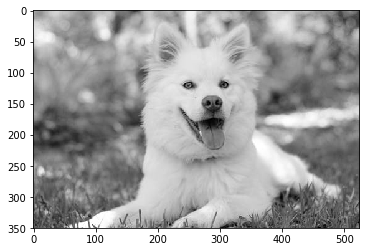

In [89]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("F7.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [90]:
from keras import Sequential
from keras.layers import Conv2D

model = Sequential()
shape = img.shape
model.add(Conv2D(1, (2, 1), input_shape=(shape[0], shape[1], 1), use_bias = False, padding = "valid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 349, 525, 1)       2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.get_layer(index = 0).get_weights()[0]

array([[[[0.88343513]]],


       [[[1.0060967 ]]]], dtype=float32)

In [92]:
import numpy as np
model.get_layer(index = 0).set_weights([np.array([[[[1]]], [[[-1]]]])])
model.get_layer(index = 0).get_weights()[0]

array([[[[ 1.]]],


       [[[-1.]]]], dtype=float32)

In [95]:
res = model.predict(img.reshape((1, shape[0], shape[1], 1)))
res = res.reshape(res.shape[1], res.shape[2])

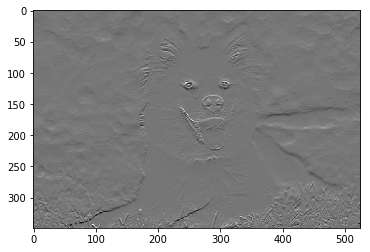

In [97]:
plt.imshow(res, cmap = "gray")

**Other kernels that can be used to detect vertical edges**

- A $3 \times 3$ matrix:
$$
\begin{pmatrix}
1 & 0 &-1\\
1 & 0 &-1\\
1 & 0 &-1\\
\end{pmatrix}
$$

- The Solbel filter:
$$
\begin{pmatrix}
1 & 0 &-1\\
2 & 0 &-2\\
1 & 0 &-1\\
\end{pmatrix}
$$

- The Scharr filter
$$
\begin{pmatrix}
3 & 0 &-3\\
10 & 0 &-10\\
3 & 0 &-3\\
\end{pmatrix}
$$

In [98]:
model = Sequential()
shape = img.shape
model.add(Conv2D(1, (3, 3), input_shape=(shape[0], shape[1], 1), use_bias = False, padding = "valid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 348, 523, 1)       9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.get_layer(index = 0).get_weights()[0].shape

(3, 3, 1, 1)

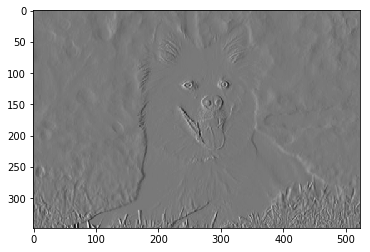

In [105]:
model.get_layer(index = 0).set_weights([np.array([[[[3]], [[0]], [[-3]]], [[[10]], [[0]], [[-10]]], [[[3]], [[0]], [[-3]]]])])
res = model.predict(img.reshape((1, shape[0], shape[1], 1)))
plt.imshow(res.reshape(res.shape[1], res.shape[2]), cmap = "gray")

- ** Sparse interactions **

This can reduce the size of weight space (and hence time complexity) from $O(N \times M)$ to $O(k \times M)$ at each layer.
<img src="F3.png" width=600></img>
<img src="F4.png" width=600></img>

Each unit in the input layer now has direct effect on only somes units in the output layer, but it can also have indirect effect when the model becomes deep.
<img src="F5.png" width=600></img>



- **Parameter sharing** (**tied weight**)

<img src="F6.png" width=600></img>

The number of parameters corresponding to a layer of $N$ inputs and $M$ outputs is now $k$ (size of the kernel's support) and not $O(M \times N)$. It improves space complexity of the model.


# 3. Parameters of the model

## 3.1 Parameters required in `keras`

Convolution is implemented in `keras` as `Conv1D`, `Conv2D` and `Conv3D` classes under the format of cross-correlation (without kernel flipping)

Important parameters:

- `filters`: number of kernels
- `kernel_size`: for example, `3x3` for Solbel or Scharr filters.
- `activation`: the activation function (like `relu`, `sigmoid`)
- `use_bias`: if `True`, a bias will be added to the convolution
- `kernel_initializer`, `bias_initializer`
- `kernel_regularizer`, `bias_regularizer`
- `input_shape`: 
 - 3D tensor for `Conv1D`, under the format (`batch_size`, `input_dimension`, `channels`)
 - 4D tensor for `Conv2D`, under the format (`batch_size`, `input_dimension_1`, `input_dimension_2`, `channels`)
 - 5D tensor for `Conv3D`, under the format (`batch_size`, `input_dimension_1`, `input_dimension_2`, `input_dimension_3`, `channels`)
`batch_size` is usually `None`
- `stride`: (3.3)
- `padding`: (3.2)

## 3.2 Padding

The `padding` parameter specifies how we compute the output dimension in terms of input dimension and kernel size.

Suppose that the input dimension is $(N_1, N_2)$ and the kernel is $(k_1, k_2)$.

- Using `padding = 'valid'` will let the output dimension to be $(M_1, M_2)$ where
$$
M_1 = N_1 - k_1 + 1, M_2 = N_2 - k_2 + 1
$$

In other words, the kernel will be apply at every submatrix (subtensor) of the input of size $k_1 \times k_2$.

In [140]:
model = Sequential()
shape = img.shape
model.add(Conv2D(1, (3, 3), input_shape=(shape[0], shape[1], 1), use_bias = False, padding = "valid"))
model.get_layer(index = 0).set_weights([np.array([[[[1]], [[0]], [[-1]]], [[[1]], [[0]], [[-1]]], [[[1]], [[0]], [[-1]]]])])
res = model.predict(img.reshape((1, shape[0], shape[1], 1)))
res.reshape((res.shape[1], res.shape[2]))

array([[ 12.,  18.,  21., ...,  59.,  60.,  35.],
       [ 12.,  18.,  21., ...,  49.,  48.,  25.],
       [ 12.,  18.,  21., ...,  37.,  33.,  14.],
       ...,
       [ 23.,  62.,  64., ...,  31.,  41.,  36.],
       [ 18.,  14.,   1., ...,  24.,  22.,   9.],
       [ 25.,   0., -20., ...,  -2.,  -8., -12.]], dtype=float32)

In [141]:
img.shape, res.shape

((350, 525), (1, 348, 523, 1))

- Using `padding = 'same'` will let the output dimension to be the same as the input's
$$
M_1 = N_1, M_2 = N_2
$$

In other words, at some boundary, virtual rows/columns containing zeros will be added. This is equivalent to padding new rows and columns around the original matrix. If some dimension of the kernel is even, new rows/columns will be add to the bottom/right.

**Illustration**
<img src="F8.png" width=300></img>

In [142]:
model2 = Sequential()
shape = img.shape
model2.add(Conv2D(1, (3, 3), input_shape=(shape[0], shape[1], 1), use_bias = False, padding = "same"))
model2.get_layer(index = 0).set_weights([np.array([[[[1]], [[0]], [[-1]]], [[[1]], [[0]], [[-1]]], [[[1]], [[0]], [[-1]]]])])
res2 = model2.predict(img.reshape((1, shape[0], shape[1], 1)))
res2.reshape((res2.shape[1], res2.shape[2]))

array([[-344.,    8.,   12., ...,   44.,   26.,  173.],
       [-515.,   12.,   18., ...,   60.,   35.,  251.],
       [-511.,   12.,   18., ...,   48.,   25.,  236.],
       ...,
       [-276.,   18.,   14., ...,   22.,    9.,  355.],
       [-271.,   25.,    0., ...,   -8.,  -12.,  389.],
       [-179.,   18.,    0., ...,  -24.,  -16.,  277.]], dtype=float32)

In [143]:
res2.shape

(1, 350, 525, 1)

In [144]:
res2.reshape((res2.shape[1], res2.shape[2]))[1:-1, 1:-1]

array([[ 12.,  18.,  21., ...,  59.,  60.,  35.],
       [ 12.,  18.,  21., ...,  49.,  48.,  25.],
       [ 12.,  18.,  21., ...,  37.,  33.,  14.],
       ...,
       [ 23.,  62.,  64., ...,  31.,  41.,  36.],
       [ 18.,  14.,   1., ...,  24.,  22.,   9.],
       [ 25.,   0., -20., ...,  -2.,  -8., -12.]], dtype=float32)

## 3.3 Strided Convolutions

We can compute convolution of **stride** $(s_1, s_2)$, i.e., we compute the convolution at $(\alpha s_1, \beta s_2)$, where $\alpha, \beta$ are integers. 

<img src="F9.png"></img>

This is called strided convolution. It can also be viewed as convolution followed by **downsampling**.

If the input has dimension $(N_1, N_2)$, the kernel's dimension is $(k_1, k_2)$ and the stride is $(s_1, s_2)$, then the output's dimension is

$$
(\lfloor \frac{N_1 - k_1 }{s_1} + 1 \rfloor, \lfloor \frac{N_2 - k_2}{s_2} + 1 \rfloor)
$$

In keras, we can specify `strides = s` or `strides = (s1, s2)`.

In [148]:
model3 = Sequential()
shape = img.shape
model3.add(Conv2D(1, (3, 3), input_shape=(shape[0], shape[1], 1), use_bias = False, padding = "valid", strides=(2, 2)))
model3.get_layer(index = 0).set_weights([np.array([[[[1]], [[0]], [[-1]]], [[[1]], [[0]], [[-1]]], [[[1]], [[0]], [[-1]]]])])
res3 = model3.predict(img.reshape((1, shape[0], shape[1], 1)))
res3 = res3.reshape((res3.shape[1], res3.shape[2]))

In [149]:
res3.shape

(174, 262)

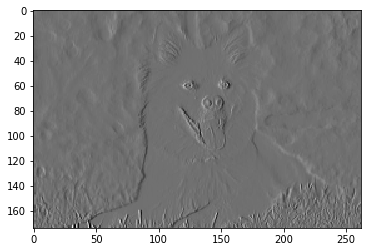

In [151]:
plt.imshow(res3, cmap = "gray")

## 3.4 Number of channels

In image processing, each pixel is a vector of 3 color modes: red, green, blue (RGB). This gives us an example of "channels", can be considered as the third shape of an image. If we work with more than 1 channel, say 3 channels, then the image of shape $28 \times 28$ becomes now a tensor $28 \times 28 \times 3$, we need to apply a 3D-convolution than a 2D-convolution. By calling the third dimension "channel", we fix the third dimension of the kernel to be the same as this number of channels (here 3). So if the input is of shape

$$
N_1 \times N_2 \times N_c
$$

then the kernel has shape
$$
k_1 \times k_2 \times N_c
$$

In case of stride 1 and no padding (padding = `'valid'`) the output will be of shape
$$
(N_1 - k_1 + 1) \times (N_2 - k_2 + 1)
$$

<img src="F11.png" width=600></img>

## 3.5 Number of filters (kernels)

In `keras`, we can computer simultaneously the convolution of an input with several kernels. If the number of kernels is $N_k$, the input is of shape
$$
N_1 \times N_2 \times N_c
$$

and each of the $N_k$ kernel is of shape
$$
k_1 \times k_2 \times N_c
$$

then the output will have shape, by definition:

$$
(N_1 - k_1 + 1) \times (N_2 - k_2 + 1) \times N_k
$$



In `keras`, we work in batch mode, i.e, work with $batchsize$ inputs at the same time. Hence, the shape of the output of `Conv1D` is a 3D-tensor, of `Conv2D` is a 4D-tensor, of `Conv3D` is a 5D-tensor of the form:

$$
batchsize \times (N_1 - k_1 + 1) \times (N_2 - k_2 + 1) \times N_k
$$

In [157]:
color_img = cv2.imread("F7.png")
color_img.shape

(350, 525, 3)

In [163]:
model4 = Sequential()
model4.add(Conv2D(8, (3, 3), input_shape=color_img.shape, use_bias = False, padding = "valid"))
res4 = model4.predict([[color_img]]) # Reshape input to batchsize x N1 x N2 x Nc
res4.shape

(1, 348, 523, 8)

If we use padding $p_1, p_2$ and stride $s_1, s_2$, the dimension becomes

$$
batchsize \times \lfloor \frac{N_1 + 2p_1 - k_1}{s_1} + 1\rfloor \times \lfloor \frac{N_2+ 2p_2 - k_2}{s_2} + 1\rfloor \times N_k
$$

# 4. Simple model and Implementation

We have seen in amphi 1, the FNN is modelized as follows:

<img src="F13.png" width=600></img>

By replacing some matrix multiplication by convolution, we have a simple CNN as follows:

<img src="F14.png" width=800></img>

**Example with MNIST**

In [196]:
from keras.datasets import mnist
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()
X_train = X_train_raw/255
X_test = X_test_raw/255
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
Y_train = np_utils.to_categorical(y_train_raw, 10)
Y_test = np_utils.to_categorical(y_test_raw, 10)

model5 = Sequential()
# Input: 28 x 28 x 1
# Nb filters: 20
# Kernel (weights): (20 x )5 x 5 x 1
# Bias: (20 x )1
# => Output: 28 x 28 x 20
model5.add(Conv2D(20, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), padding="same"))
model5.add(Activation("relu"))
# => Flatten: 28 x 28 x 20 = 15680
model5.add(Flatten())
# => Weights: 15680 x 100
model5.add(Dense(100))
model5.add(Activation("relu"))
model5.add(Dense(10))
model5.add(Activation("softmax"))

model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
activation_32 (Activation)   (None, 28, 28, 20)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 15680)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               1568100   
_________________________________________________________________
activation_33 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
_________________________________________________________________
activation_34 (Activation)   (None, 10)                0         
Total para

In [185]:
from keras.optimizers import SGD

BATCH_SIZE = 128
NB_EPOCH = 20
VERBOSE = 1
VALIDATION_SPLIT = 0.2

model5.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.1), metrics=["accuracy"])
history5 = model5.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 31s 650us/step - loss: 0.3665 - acc: 0.8891 - val_loss: 0.1533 - val_acc: 0.9569
Epoch 2/20
48000/48000 [==============================] - 28s 573us/step - loss: 0.1331 - acc: 0.9603 - val_loss: 0.1067 - val_acc: 0.9698
Epoch 3/20
48000/48000 [==============================] - 28s 582us/step - loss: 0.0875 - acc: 0.9740 - val_loss: 0.0928 - val_acc: 0.9731
Epoch 4/20
48000/48000 [==============================] - 28s 591us/step - loss: 0.0656 - acc: 0.9803 - val_loss: 0.0721 - val_acc: 0.9787
Epoch 5/20
48000/48000 [==============================] - 30s 620us/step - loss: 0.0519 - acc: 0.9847 - val_loss: 0.0762 - val_acc: 0.9768
Epoch 6/20
48000/48000 [==============================] - 32s 664us/step - loss: 0.0420 - acc: 0.9873 - val_loss: 0.0681 - val_acc: 0.9808
Epoch 7/20
48000/48000 [==============================] - 31s 652us/step - loss: 0.0348 - acc: 0.9891 - val_loss: 0.

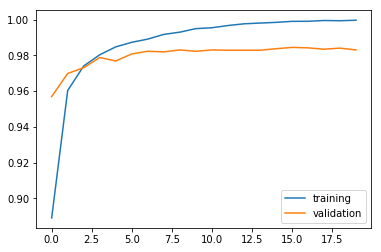

In [188]:
plt.plot(range(20), history5.history.get('acc'), label='training')
plt.plot(range(20), history5.history.get('val_acc'), label='validation')
plt.legend()

# 5. Pooling

Usually, a **pooling** operation is applied after each convolution step. The model becomes:

<img src="F15.png" width=900></img>

So, typically a layer of a convolutional network consists of 3 stages:
- convolution
- activation (by a linear or non-linear function)
- pooling

<img src="F16.png" width=600></img>

A pooling operation replaces the ouput by a **summary statistic of the nearby outputs**, for example: max of nearby outputs (Max-Pooling) or average of nearby outputs (Average-Pooling)

## 5.1 The Max-Pooling Operation

The Max-Pooling operation replaces each output by the maximum output within a neighborhood (typically rectangular)
<img src="F17.png" width=400></img>

Max-Pooling and other kinds of pooling in general provide **invariance** to local translation.
<img src="F18.png" width=600></img>


## 5.2 Implementation in `keras`

https://keras.io/layers/pooling/
`keras` implements `MaxPooling1D`, `MaxPooling2D` and `MaxPooling3D`.

For `MaxPooling2D`, the arguments are:

- `pool_size`: $(p_1, p_2)$: searching for maximum in a $p_1 \times p_2$ rectangle
- `strides`: distance between consecutive rectangles. By default, it is `pool_size`
- `padding`: `'valid'` or `'same'`

Input shape: 3D tensor for `MaxPooling1D`, 4D tensor for `MaxPooling2D`, 5D tensor for `MaxPooling2D`

Example with `MaxPooling2D`: the input shape is
$$
batchsize \times N_1 \times N_2 \times N_c
$$
where $N_c$ is the number of channels.

The output shape is 
$$
batchsize \times N_1' \times N_2' \times N_c
$$

where $N_1', N_2'$ are number of rows, columns after pooling.

We have
$$
N_1' = \lfloor N_1 / p_1\rfloor, N_2' = \lfloor N_2/p_2 \rfloor
$$


## 5.3 Example: MNIST

In [195]:
model6 = Sequential()
# Input: 28 x 28 x 1
# Nb filters: 20
# Kernel (weights): (20 x )5 x 5 x 1
# Bias: (20 x )1
# => Output: 28 x 28 x 20
model6.add(Conv2D(20, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), padding="same"))
model6.add(Activation("relu"))
model6.add(MaxPooling2D(pool_size = (2, 2)))
# => Flatten: 28 x 28 x 20 = 15680
model6.add(Flatten())
# => Weights: 15680 x 100
model6.add(Dense(100))
model6.add(Activation("relu"))
model6.add(Dense(10))
model6.add(Activation("softmax"))

model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
activation_29 (Activation)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3920)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               392100    
_________________________________________________________________
activation_30 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
__________

In [197]:
model6.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.1), metrics=["accuracy"])
history6 = model6.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 27s 566us/step - loss: 0.4077 - acc: 0.8742 - val_loss: 0.1706 - val_acc: 0.9478
Epoch 2/20
48000/48000 [==============================] - 23s 484us/step - loss: 0.1389 - acc: 0.9585 - val_loss: 0.1180 - val_acc: 0.9656
Epoch 3/20
48000/48000 [==============================] - 25s 521us/step - loss: 0.0919 - acc: 0.9718 - val_loss: 0.0803 - val_acc: 0.9769
Epoch 4/20
48000/48000 [==============================] - 25s 522us/step - loss: 0.0694 - acc: 0.9793 - val_loss: 0.0706 - val_acc: 0.9784
Epoch 5/20
48000/48000 [==============================] - 25s 518us/step - loss: 0.0569 - acc: 0.9829 - val_loss: 0.0657 - val_acc: 0.9801
Epoch 6/20
48000/48000 [==============================] - 25s 527us/step - loss: 0.0479 - acc: 0.9857 - val_loss: 0.0641 - val_acc: 0.9813
Epoch 7/20
48000/48000 [==============================] - 26s 541us/step - loss: 0.0402 - acc: 0.9880 - val_loss: 0.

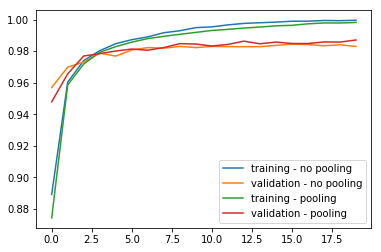

In [199]:
plt.plot(range(20), history5.history.get('acc'), label='training - no pooling')
plt.plot(range(20), history5.history.get('val_acc'), label='validation - no pooling')
plt.plot(range(20), history6.history.get('acc'), label='training - pooling')
plt.plot(range(20), history6.history.get('val_acc'), label='validation - pooling')
plt.legend()

# 6. Back Propagation for CNN 

# References

[1] C. Bishop, *Pattern Recognition and Machine Learning*  

[2] I. Goodfellow, Y. Bengio, A.Courville, *Deep Learning*

[3] A. Ng, K. Katanforoosh, B. Mouru, *Convolutional Neural Networks* (Course in coursera.org)